### We use decision tree for imputation, LR and Random forest for prediction

In [752]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [753]:
pillow = pd.read_csv("SaYoPillow.csv")
pillow.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
0,91.840,16.600,89.840,1.840,74.20,3
1,91.552,15.880,89.552,1.552,72.76,3
2,96.000,10.000,95.000,7.000,60.00,1
3,90.768,13.920,88.768,0.768,68.84,3
4,97.872,6.496,96.248,8.248,53.12,0


In [754]:
pillow.shape

(630, 6)

In [755]:
pillow.isnull().values.sum()

0

In [756]:
pillow.duplicated().sum()

0

In [757]:
pillow.dtypes

body_temperature    float64
limb_movement       float64
Blood_oxygen        float64
Sleeping_hours      float64
Heart_rate          float64
Stress_level          int64
dtype: object

In [758]:
pillow.describe()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,92.80000,11.700000,90.900000,3.700000,64.500000,2.000000
std,3.52969,4.299629,3.902483,3.054572,9.915277,1.415337
min,85.00000,4.000000,82.000000,0.000000,50.000000,0.000000
25%,90.50000,8.500000,88.500000,0.500000,56.250000,1.000000
50%,93.00000,11.000000,91.000000,3.500000,62.500000,2.000000
75%,95.50000,15.750000,94.250000,6.500000,72.500000,3.000000
max,99.00000,19.000000,97.000000,9.000000,85.000000,4.000000


## Data Visualization

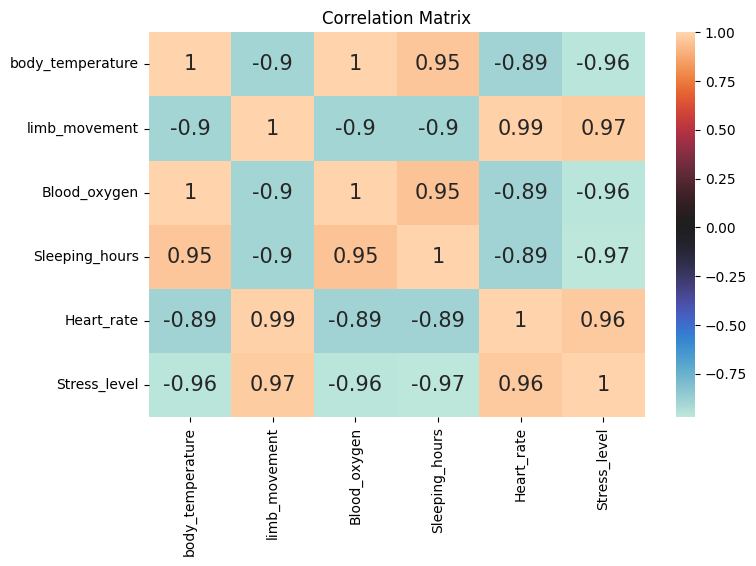

In [759]:
fig, ax = plt.subplots(figsize=(8,5))
cols=["body_temperature", "limb_movement","Blood_oxygen","Sleeping_hours", "Heart_rate", "Stress_level"]
sns.heatmap(pillow[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})
plt.title("Correlation Matrix")
plt.show()

### --Stress Levels and Sleeping Hours are strongly negatively correlated. The more people sleep, the less they are likely to be stressed

### --Body temperature and stress level are highly negatively correlated

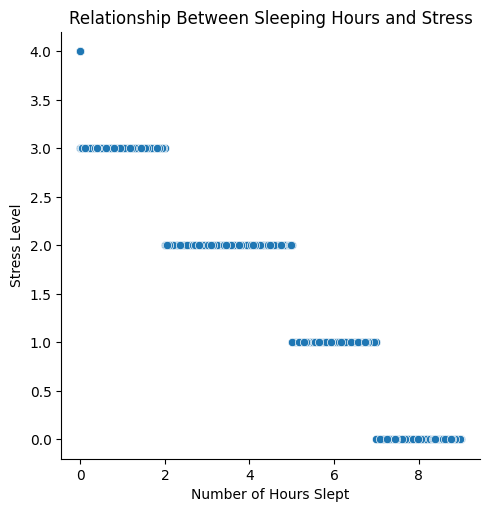

In [760]:
sns.relplot(x="Sleeping_hours", y="Stress_level", data=pillow, kind="scatter")
plt.xlabel("Number of Hours Slept")
plt.ylabel("Stress Level")
plt.title("Relationship Between Sleeping Hours and Stress")
plt.show()

### Here we can clearly spot the negative correlation between Stress (categorical variable) and Number of Hours Slept (continuous variable).

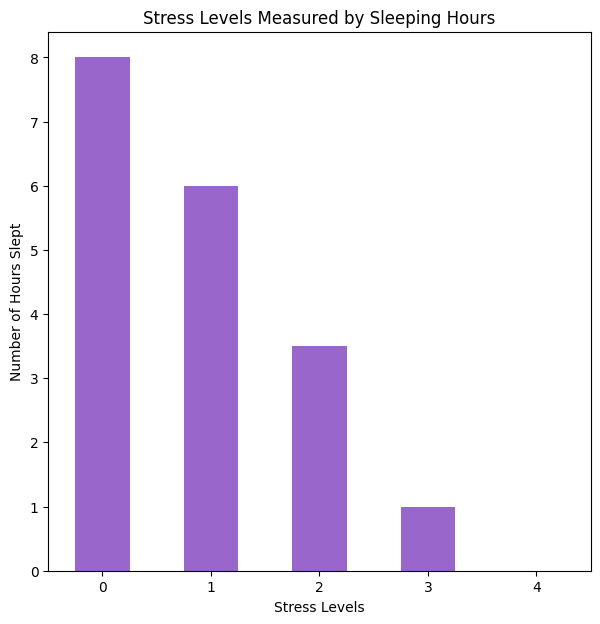

In [761]:
fig, ax = plt.subplots(figsize=(7,7))
pillow.groupby(pillow["Stress_level"])["Sleeping_hours"].mean().plot(kind='bar', rot=0, color='#9966cc')
plt.title("Stress Levels Measured by Sleeping Hours")
plt.xlabel("Stress Levels")
plt.ylabel("Number of Hours Slept")
plt.show()

#### People who sleep 8 hours on average in a single day report no or very low stress levels

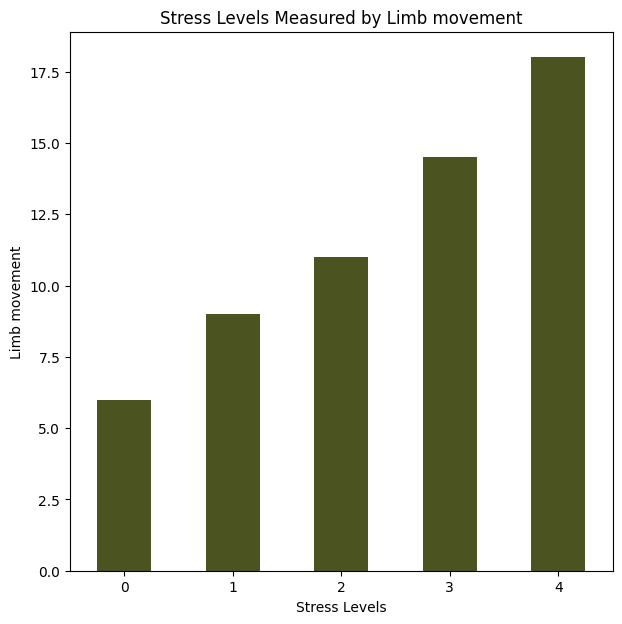

In [762]:
fig, ax = plt.subplots(figsize=(7,7))
pillow.groupby(pillow["Stress_level"])["limb_movement"].mean().plot(kind='bar', rot=0, color='#4b5320')
plt.title("Stress Levels Measured by Limb movement")
plt.xlabel("Stress Levels")
plt.ylabel("Limb movement")
plt.show()

#### It is detected that people with high limb movement have more stress

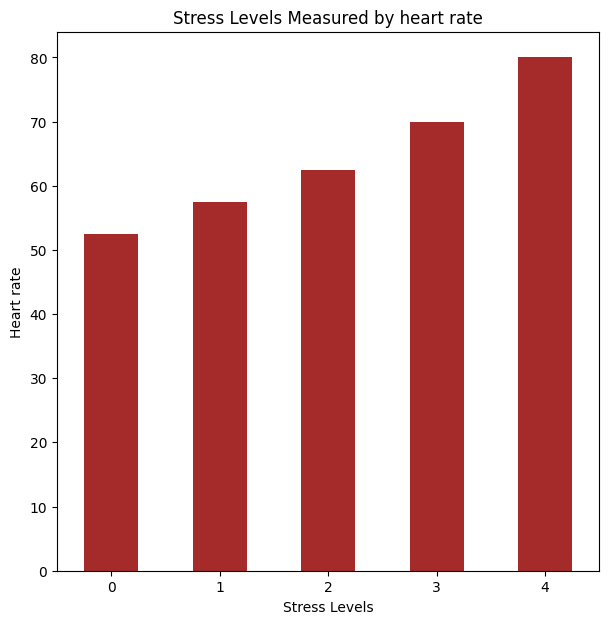

In [763]:
fig, ax = plt.subplots(figsize=(7,7))
pillow.groupby(pillow["Stress_level"])["Heart_rate"].mean().plot(kind='bar', rot=0, color='#a52a2a')
plt.title("Stress Levels Measured by heart rate")
plt.xlabel("Stress Levels")
plt.ylabel("Heart rate")
plt.show()

#### Stressed people have higher heart rate, people with low or no stress have heart rate between 50-60

## Outliers reduction

C:\Users\hp\AppData\Local\Temp\ipykernel_11276\2437056928.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pillow['limb_movement'])
C:\Users\hp\AppData\Local\Temp\ipykernel_11276\2437056928.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pillow['Heart_rate'])


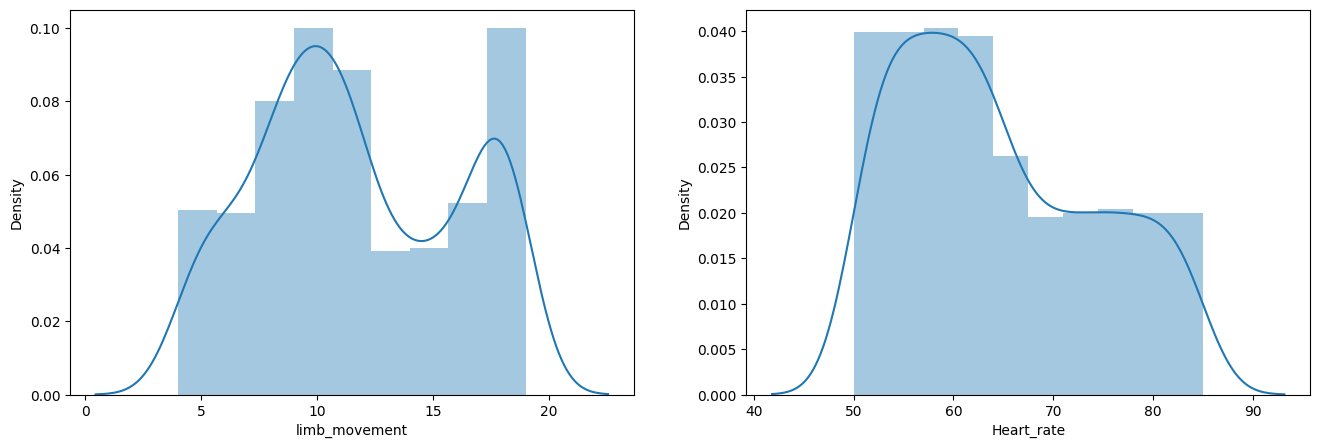

In [764]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(pillow['limb_movement'])
plt.subplot(1,2,2)
sns.distplot(pillow['Heart_rate'])
plt.show()

### Applying IQR in limb movement 

In [765]:
print("Highest allowed",pillow['limb_movement'].mean() + 3*pillow['limb_movement'].std())
print("Lowest allowed",pillow['limb_movement'].mean() - 3*pillow['limb_movement'].std())

Highest allowed 24.598887444167318
Lowest allowed -1.198887444167319


In [766]:
pillow[(pillow['limb_movement'] > 24.59888744416733) | (pillow['limb_movement'] < -1.1988874441673119)]

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level


#### No outlier detected in limb movement

### Detecting outlier using box plot 

<AxesSubplot: >

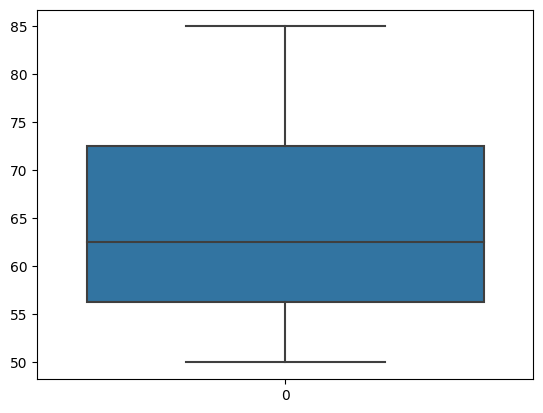

In [767]:
sns.boxplot(pillow['Heart_rate'])

<AxesSubplot: >

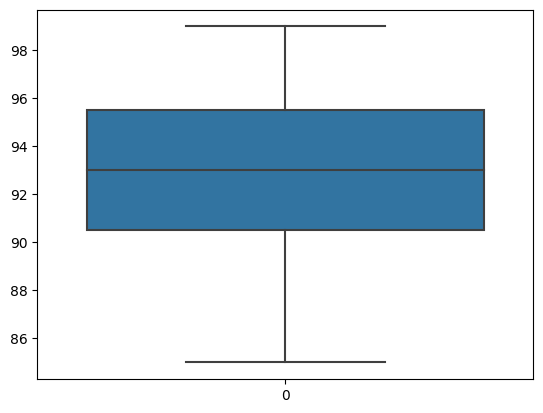

In [768]:
sns.boxplot(pillow['body_temperature'])

<AxesSubplot: >

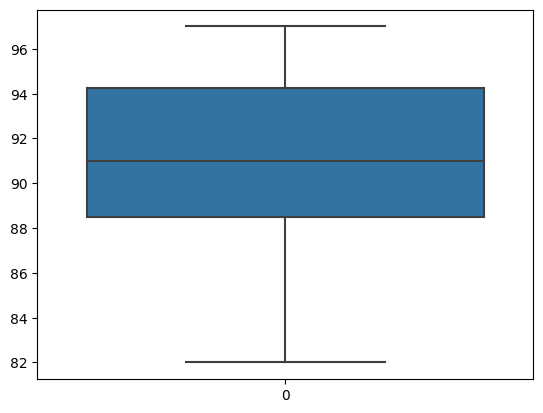

In [769]:
sns.boxplot(pillow['Blood_oxygen'])

<AxesSubplot: >

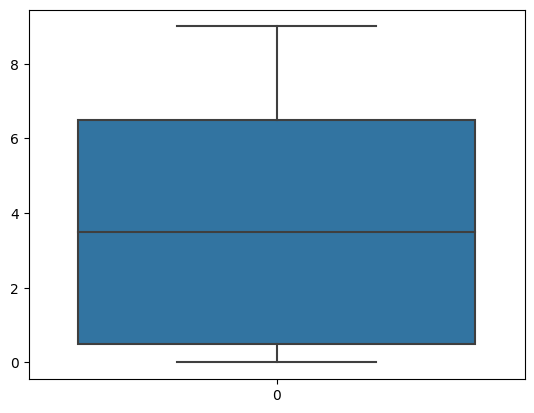

In [770]:
sns.boxplot(pillow['Sleeping_hours'])

### No outlier detected in Heart rate, body temperature, Blood oxygen, Sleeping hours

In [771]:
df1 = pillow.copy()

## Data standardization

In [772]:
Y=pillow['Stress_level']

In [773]:
X=pillow.drop(['Stress_level'],axis=1)

In [774]:
X.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
0,91.840,16.600,89.840,1.840,74.20
1,91.552,15.880,89.552,1.552,72.76
2,96.000,10.000,95.000,7.000,60.00
3,90.768,13.920,88.768,0.768,68.84
4,97.872,6.496,96.248,8.248,53.12


In [775]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [776]:
X= scaler.transform(X)

## Logistic Regression

In [777]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X,Y)
from sklearn.metrics import accuracy_score
X_train_prediction = lr.predict(X)
training_data_accuracy_LR= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_LR)

Accuracy score of training data :  0.9698412698412698


## Random Forest

In [778]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, Y)
X_train_prediction = classifier.predict(X)
training_data_accuracy_RF= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_RF)

Accuracy score of training data :  1.0


## Decision Tree

In [779]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X, Y)
X_train_prediction = classifier.predict(X)
training_data_accuracy_DT= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_DT)

Accuracy score of training data :  1.0


## KNN

In [780]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')
classifier.fit(X, Y)
X_train_prediction = classifier.predict(X)
training_data_accuracy_KNN= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_KNN)

Accuracy score of training data :  1.0


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## SVM

In [781]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1.0, degree=3)
classifier.fit(X, Y)
X_train_prediction = classifier.predict(X)
training_data_accuracy_SVM= accuracy_score(Y, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy_SVM)

Accuracy score of training data :  1.0


# Testing Data

In [782]:
p_test=pd.read_csv('test.csv')

In [783]:
p_test.rename(columns = {'Sleeping_hours\t':'Sleeping_hours'}, inplace = True)

In [784]:
p_test = p_test.drop(['Snoring_rate','Respiration_rate','Eye_movement'],axis=1)
p_test.head()

,limb_movement,Sleeping_hours,Heart_rate,Stress_level
0,16,1.840,70,3
1,20,1.552,95,3
2,20,7.000,65,1
3,20,0.768,89,3
4,7,8.248,72,0


In [785]:
p1_test = p_test.copy()
p1_test.head()

,limb_movement,Sleeping_hours,Heart_rate,Stress_level
0,16,1.840,70,3
1,20,1.552,95,3
2,20,7.000,65,1
3,20,0.768,89,3
4,7,8.248,72,0


In [786]:
df1.head() #reqd

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
0,91.840,16.600,89.840,1.840,74.20,3
1,91.552,15.880,89.552,1.552,72.76,3
2,96.000,10.000,95.000,7.000,60.00,1
3,90.768,13.920,88.768,0.768,68.84,3
4,97.872,6.496,96.248,8.248,53.12,0


In [787]:
df2 = df1.copy()

In [788]:
df1 = df1[['limb_movement','Sleeping_hours','Heart_rate','Stress_level','body_temperature','Blood_oxygen']]
df1.head()

,limb_movement,Sleeping_hours,Heart_rate,Stress_level,body_temperature,Blood_oxygen
0,16.600,1.840,74.20,3,91.840,89.840
1,15.880,1.552,72.76,3,91.552,89.552
2,10.000,7.000,60.00,1,96.000,95.000
3,13.920,0.768,68.84,3,90.768,88.768
4,6.496,8.248,53.12,0,97.872,96.248


## body_temperature imputation

In [789]:
df1_x = df1.iloc[:,:-2].values
df1_y = df1.iloc[:,-2].values
df1_x

array([[16.6  ,  1.84 , 74.2  ,  3.   ],
       [15.88 ,  1.552, 72.76 ,  3.   ],
       [10.   ,  7.   , 60.   ,  1.   ],
       ...,
       [17.752,  0.   , 78.76 ,  4.   ],
       [ 9.728,  6.728, 59.32 ,  1.   ],
       [11.392,  4.088, 63.48 ,  2.   ]])

In [790]:
p1_test1 = np.array(p1_test)
#p1_test1

In [791]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(df1_x,df1_y)
p1_body_temp = regressor.predict(p1_test1)
p1_body_temp

array([91.392, 91.664, 96.   , 91.2  , 98.376, 95.664, 97.272, 98.88 ,
       96.408, 94.88 , 93.376, 95.856, 98.376, 89.72 , 91.2  , 94.784,
       95.28 , 91.2  , 91.184, 92.384, 93.728, 93.728, 92.784, 90.368,
       91.648, 94.784, 93.728, 94.784, 91.984, 92.208, 98.4  , 90.   ,
       98.376, 85.08 , 92.   , 90.608, 98.376, 86.48 , 96.6  , 86.48 ,
       92.144, 92.592, 93.408, 98.4  , 93.376, 89.72 , 92.272, 89.72 ,
       94.88 , 86.48 ])

In [792]:
p1_body_temp = pd.DataFrame(p1_body_temp, columns = ['body_temperature'])
p1_body_temp.head()

,body_temperature
0,91.392
1,91.664
2,96.000
3,91.200
4,98.376


## Blood_oxygen Imputation

In [793]:
df1_x2 = df1.iloc[:,:-2].values
df1_y2 = df1.iloc[:,-1].values
df1_x2

array([[16.6  ,  1.84 , 74.2  ,  3.   ],
       [15.88 ,  1.552, 72.76 ,  3.   ],
       [10.   ,  7.   , 60.   ,  1.   ],
       ...,
       [17.752,  0.   , 78.76 ,  4.   ],
       [ 9.728,  6.728, 59.32 ,  1.   ],
       [11.392,  4.088, 63.48 ,  2.   ]])

In [794]:
#df1_y2

In [795]:
# p1_test1

In [796]:
from sklearn.tree import DecisionTreeRegressor
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(df1_x2,df1_y2)
p1_blood_ox = regressor1.predict(p1_test1)
p1_blood_ox

array([89.84 , 89.68 , 95.   , 88.976, 96.552, 94.568, 96.568, 97.   ,
       95.096, 93.32 , 90.976, 94.784, 96.552, 85.168, 89.2  , 92.936,
       92.936, 88.976, 88.736, 90.656, 91.616, 91.6  , 90.752, 88.464,
       89.328, 93.248, 91.84 , 92.936, 89.984, 90.112, 96.92 , 88.   ,
       96.552, 83.056, 90.   , 88.656, 96.552, 83.68 , 95.384, 83.68 ,
       90.112, 90.112, 91.536, 96.92 , 90.976, 85.168, 90.112, 85.168,
       94.328, 83.824])

In [797]:
p1_blood_ox = pd.DataFrame(p1_blood_ox, columns = ['Blood_oxygen'])
p1_blood_ox.head()

,Blood_oxygen
0,89.840
1,89.680
2,95.000
3,88.976
4,96.552


In [798]:
test = pd.concat([p1_test,p1_body_temp,p1_blood_ox], axis=1, join='inner')
test.head()

,limb_movement,Sleeping_hours,Heart_rate,Stress_level,body_temperature,Blood_oxygen
0,16,1.840,70,3,91.392,89.840
1,20,1.552,95,3,91.664,89.680
2,20,7.000,65,1,96.000,95.000
3,20,0.768,89,3,91.200,88.976
4,7,8.248,72,0,98.376,96.552


In [799]:
test.tail()

,limb_movement,Sleeping_hours,Heart_rate,Stress_level,body_temperature,Blood_oxygen
45,15,0.000,85,4,89.720,85.168
46,8,2.432,67,2,92.272,90.112
47,15,0.000,89,4,89.720,85.168
48,4,6.344,70,1,94.880,94.328
49,19,0.000,78,4,86.480,83.824


In [800]:
test = test[['body_temperature','limb_movement','Blood_oxygen','Sleeping_hours','Heart_rate','Stress_level']]
test.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level
0,91.392,16,89.840,1.840,70,3
1,91.664,20,89.680,1.552,95,3
2,96.000,20,95.000,7.000,65,1
3,91.200,20,88.976,0.768,89,3
4,98.376,7,96.552,8.248,72,0


## Prediction

In [801]:
Y_test = test['Stress_level']

In [802]:
X_test = test.drop(['Stress_level'],axis=1)

In [803]:
X

array([[-0.2721947 ,  1.14053872, -0.27183777, -0.60940713,  0.97906569],
       [-0.35385311,  0.97294936, -0.34569558, -0.70376694,  0.83371986],
       [ 0.90731566, -0.39569711,  1.05144797,  1.08120619, -0.45420573],
       ...,
       [-1.67853398,  1.4086817 , -1.70385862, -1.21226149,  1.43932751],
       [ 0.83019383, -0.45900864,  0.94681608,  0.99208859, -0.52284127],
       [ 0.1678534 , -0.07169101,  0.12617376,  0.12712364, -0.1029533 ]])

In [804]:
X_test.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate
0,91.392,16,89.840,1.840,70
1,91.664,20,89.680,1.552,95
2,96.000,20,95.000,7.000,65
3,91.200,20,88.976,0.768,89
4,98.376,7,96.552,8.248,72


In [805]:
X_test = scaler.transform(X_test)

#### Predicting Test results

In [806]:
X_test_prediction = lr.predict(X_test)
test_data_accuracy_LR= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_LR)

Accuracy score of training data :  0.64


## Predicting test data using random Forest 

In [807]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X, Y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [808]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy_RF= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_RF)

Accuracy score of training data :  0.92


## Acc PreC RecL F1_RF

In [809]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(Y_test, X_test_prediction)
prec = precision_score(Y_test, X_test_prediction, average='weighted')
rec = recall_score(Y_test, X_test_prediction, average='weighted')
f1 = f1_score(Y_test, X_test_prediction, average='weighted')

print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % rec)
print('F1-score: %.4f' % f1)


Accuracy: 0.9200
Precision: 0.9223
Recall: 0.9200
F1-score: 0.9179


In [810]:
## Predicting test data using Decision Tree 

## Predicting test data using Decision Tree

In [811]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X, Y)

DecisionTreeClassifier()

In [812]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy_DT= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_DT)

Accuracy score of training data :  0.52


In [813]:
while test_data_accuracy_DT<0.7:
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2)
    classifier.fit(X, Y)
    X_test_prediction = classifier.predict(X_test)
    test_data_accuracy_DT= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_DT)

KeyboardInterrupt: 

## Acc PreC RecL F1_DT

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(Y_test, X_test_prediction)
prec = precision_score(Y_test, X_test_prediction, average='weighted')
rec = recall_score(Y_test, X_test_prediction, average='weighted')
f1 = f1_score(Y_test, X_test_prediction, average='weighted')

print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % rec)
print('F1-score: %.4f' % f1)


Accuracy: 0.8200
Precision: 0.8238
Recall: 0.8200
F1-score: 0.8182


## Predicting test data using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')
classifier.fit(X, Y)

KNeighborsClassifier()

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy_KNN= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_KNN)

Accuracy score of training data :  0.74


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Acc PreC RecL F1_KNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(Y_test, X_test_prediction)
prec = precision_score(Y_test, X_test_prediction, average='weighted')
rec = recall_score(Y_test, X_test_prediction, average='weighted')
f1 = f1_score(Y_test, X_test_prediction, average='weighted')

print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % rec)
print('F1-score: %.4f' % f1)


Accuracy: 0.7400
Precision: 0.7364
Recall: 0.7400
F1-score: 0.7249


## Predicting test data using SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', C=1.0, degree=3)
classifier.fit(X, Y)

SVC()

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy_SVM= accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of training data : ', test_data_accuracy_SVM)

Accuracy score of training data :  0.76


## Acc PreC RecL F1_SVM

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(Y_test, X_test_prediction)
prec = precision_score(Y_test, X_test_prediction, average='weighted')
rec = recall_score(Y_test, X_test_prediction, average='weighted')
f1 = f1_score(Y_test, X_test_prediction, average='weighted')

print('Accuracy: %.4f' % acc)
print('Precision: %.4f' % prec)
print('Recall: %.4f' % rec)
print('F1-score: %.4f' % f1)


Accuracy: 0.7600
Precision: 0.7604
Recall: 0.7600
F1-score: 0.7508
